# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
num_cities = len(cities)
print(num_cities)


600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# Create an empty lists to store the responses
response_json = []
City = []          
Lat = []           
Lng = []          
Max_Temp = []      
Humidity = []      
Cloudiness = []   
Wind_Speed = []   
Country = []      
Date = []

url = "https://api.openweathermap.org/data/2.5/weather?q="

# Make a request for each of the city
print("Beginning Data Retrieval\n----------------------------")
for x in range(len(cities)):
    if {cities[x]} == {cities[x]}:
        print(f"Processing Record: {x + 1} of {num_cities}: {cities[x]}")
    else:
        print("City not found Skipping Request")
    try:
        # Get one of the cities
        cities_response = requests.get(url + str(cities[x]) + "&units=imperial" + "&appid=" + weather_api_key).json()
    
        # Save cities_response to list
        response_json.append(cities_response) 
        # Save to list for city_date dict
        City.append(cities_response['name'])
        Lat.append(cities_response['coord']['lat'])
        Lng.append(cities_response['coord']['lon'])
        Max_Temp.append(cities_response['main']['temp_max'])
        Humidity.append(cities_response['main']['humidity'])
        Cloudiness.append(cities_response['clouds']['all'])
        Wind_Speed.append(cities_response['wind']['speed'])
        Country.append(cities_response['sys']['country'])
        Date.append(cities_response['dt'])
    except:
        print("City not found. Skipping...")
print("""-----------------------------
         Data Retrieval Complete      
         -----------------------------""")

Beginning Data Retrieval
----------------------------
Processing Record: 1 of 600: kununurra
Processing Record: 2 of 600: rikitea
Processing Record: 3 of 600: hasaki
Processing Record: 4 of 600: nikolskoye
Processing Record: 5 of 600: chaumont
Processing Record: 6 of 600: ribeira grande
Processing Record: 7 of 600: vaitupu
City not found. Skipping...
Processing Record: 8 of 600: solnechnyy
Processing Record: 9 of 600: hvolsvollur
Processing Record: 10 of 600: ushuaia
Processing Record: 11 of 600: saint-augustin
Processing Record: 12 of 600: taolanaro
City not found. Skipping...
Processing Record: 13 of 600: haines junction
Processing Record: 14 of 600: dikson
Processing Record: 15 of 600: komsomolskiy
Processing Record: 16 of 600: kurilsk
Processing Record: 17 of 600: chifeng
Processing Record: 18 of 600: new norfolk
Processing Record: 19 of 600: carnarvon
Processing Record: 20 of 600: kapaa
Processing Record: 21 of 600: zhanakorgan
Processing Record: 22 of 600: east london
Processing 

Processing Record: 195 of 600: kahului
Processing Record: 196 of 600: ostrovnoy
Processing Record: 197 of 600: mys shmidta
City not found. Skipping...
Processing Record: 198 of 600: norman wells
Processing Record: 199 of 600: kenai
Processing Record: 200 of 600: amapa
Processing Record: 201 of 600: qingdao
Processing Record: 202 of 600: saint-philippe
Processing Record: 203 of 600: gilbues
Processing Record: 204 of 600: beyneu
Processing Record: 205 of 600: naftah
City not found. Skipping...
Processing Record: 206 of 600: saint-louis
Processing Record: 207 of 600: banmo
City not found. Skipping...
Processing Record: 208 of 600: kudahuvadhoo
Processing Record: 209 of 600: longyearbyen
Processing Record: 210 of 600: bemidji
Processing Record: 211 of 600: lolua
City not found. Skipping...
Processing Record: 212 of 600: lorengau
Processing Record: 213 of 600: at-bashi
Processing Record: 214 of 600: surenavan
Processing Record: 215 of 600: svetlyy
Processing Record: 216 of 600: senanga
Proc

Processing Record: 386 of 600: guangzhou
Processing Record: 387 of 600: warqla
City not found. Skipping...
Processing Record: 388 of 600: nalut
Processing Record: 389 of 600: outram
Processing Record: 390 of 600: puerto baquerizo moreno
Processing Record: 391 of 600: tateyama
Processing Record: 392 of 600: tabuk
Processing Record: 393 of 600: nova serrana
Processing Record: 394 of 600: comodoro rivadavia
Processing Record: 395 of 600: florence
Processing Record: 396 of 600: oksfjord
Processing Record: 397 of 600: nahrin
Processing Record: 398 of 600: muriwai beach
Processing Record: 399 of 600: penalva
Processing Record: 400 of 600: havelock
Processing Record: 401 of 600: geresk
City not found. Skipping...
Processing Record: 402 of 600: mahaicony
City not found. Skipping...
Processing Record: 403 of 600: lasa
Processing Record: 404 of 600: deshnok
Processing Record: 405 of 600: gold coast
Processing Record: 406 of 600: egvekinot
Processing Record: 407 of 600: fukue
Processing Record: 4

Processing Record: 580 of 600: ust-tsilma
Processing Record: 581 of 600: hare bay
Processing Record: 582 of 600: dabat
Processing Record: 583 of 600: enterprise
Processing Record: 584 of 600: broken hill
Processing Record: 585 of 600: san juan de la maguana
Processing Record: 586 of 600: pontal do parana
Processing Record: 587 of 600: tarudant
City not found. Skipping...
Processing Record: 588 of 600: rio gallegos
Processing Record: 589 of 600: ponta delgada
Processing Record: 590 of 600: arlit
Processing Record: 591 of 600: labytnangi
Processing Record: 592 of 600: verkhnyaya inta
Processing Record: 593 of 600: abu kamal
Processing Record: 594 of 600: kushmurun
Processing Record: 595 of 600: hihifo
City not found. Skipping...
Processing Record: 596 of 600: goderich
Processing Record: 597 of 600: ahipara
Processing Record: 598 of 600: airai
Processing Record: 599 of 600: forio
Processing Record: 600 of 600: makakilo city
-----------------------------
         Data Retrieval Complete   

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
#create dictonary of list City Data
city_data = {"City": City,
              "Lat": Lat,
              "Lng": Lng,
              "Max Temp": Max_Temp,
              "Humidity": Humidity,
              "Cloudiness": Cloudiness,
              "Wind Speed": Wind_Speed,
              "Country": Country,
              "Date": Date}

city_data_df = pd.DataFrame(city_data)
city_data_df.count()
city_data_df.to_csv(output_data_file)

In [5]:
#Display city_df
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bitterfeld-Wolfen,51.62,12.32,52.00,84,33,9.17,DE,1587769820
1,Jamestown,42.10,-79.24,51.80,57,1,9.17,US,1587769821
2,Hermanus,-34.42,19.23,61.03,84,23,12.71,ZA,1587769299
3,Airai,-8.93,125.41,66.54,61,73,5.06,TL,1587769822
4,Eureka,40.80,-124.16,68.00,77,1,16.11,US,1587769822
5,De-Kastri,51.47,140.78,32.29,95,100,4.97,RU,1587769823
6,Mataura,-46.19,168.86,52.00,84,60,17.00,NZ,1587769823
7,Port Lincoln,-34.73,135.87,64.65,70,80,10.69,AU,1587769824
8,Port Elizabeth,-33.92,25.57,62.60,93,20,10.29,ZA,1587769824
9,Butaritari,3.07,172.79,81.61,82,96,20.11,KI,1587769824


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,21.394806,19.942297,60.933127,68.418728,51.975265,8.120230,1.587770e+09
std,32.889363,90.044692,19.712075,22.196379,36.878553,5.784607,1.408598e+02
min,-54.800000,-175.200000,-2.200000,6.000000,0.000000,0.340000,1.587769e+09
25%,-4.040000,-60.557500,46.400000,56.000000,14.250000,4.000000,1.587770e+09
50%,24.110000,24.550000,63.000000,73.000000,55.000000,7.090000,1.587770e+09
75%,49.522500,102.852500,77.652500,85.000000,90.000000,11.247500,1.587770e+09
max,77.480000,179.320000,104.000000,100.000000,100.000000,55.250000,1.587770e+09


In [31]:
#  Get the indices of cities that have humidity over 100%.


In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [33]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
city_data_df.to_csv(output_data_file)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

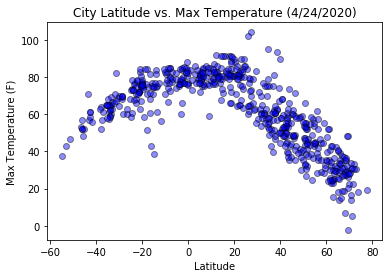

In [84]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], color="blue", marker="o", edgecolors="black",vmin=None, vmax=None, alpha=.45)

plt.title(f"City Latitude vs. Max Temperature (4/24/2020)") # ADD DATE
plt.xlabel(f"Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

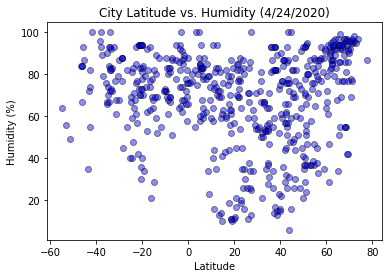

In [85]:
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], color="blue", marker="o", edgecolors="black",vmin=None, vmax=None, alpha=.45)
plt.title(f"City Latitude vs. Humidity (4/24/2020)")
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

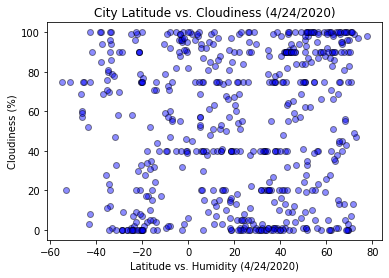

In [83]:
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], color="blue", marker="o", edgecolors="black",vmin=None, vmax=None, alpha=.45)
plt.title(f"City Latitude vs. Cloudiness (4/24/2020)")
plt.xlabel(f"Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

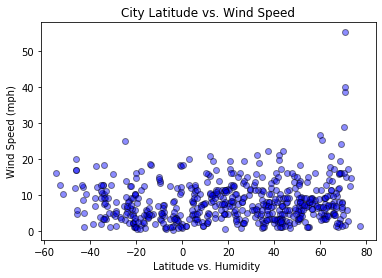

In [37]:
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], color="blue", marker="o", edgecolors="black",vmin=None, vmax=None, alpha=.45)
plt.title(f"City Latitude vs. Wind Speed (4/24/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [107]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    Y = slope * x + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Plot 
    plt.scatter(x,y, color="blue", marker="o", edgecolors="black", alpha=.45,)
    plt.annotate(line_eq,(1,2),size=14,)
    #add Linear Regression Line
    plt.plot(x,Y)
    plt.xlabel("Latitude")
    

In [108]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_df[city_data_df["Lat"]>0]
#northern_df.describe()
southern_df = city_data_df[city_data_df["Lat"]<0]
#southern_df.describe()

# Northern Values
N_Lat = northern_df["Lat"]
N_Max_Temp = northern_df["Max Temp"]
N_Humidity = northern_df["Humidity"]
N_Cloud = northern_df["Cloudiness"]
N_Wind = northern_df["Wind Speed"]

#Southern Values
S_Lat = southern_df["Lat"]
S_Max_Temp = southern_df["Max Temp"]
S_Humidity = southern_df["Humidity"]
S_Cloud = southern_df["Cloudiness"]
S_Wind = southern_df["Wind Speed"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

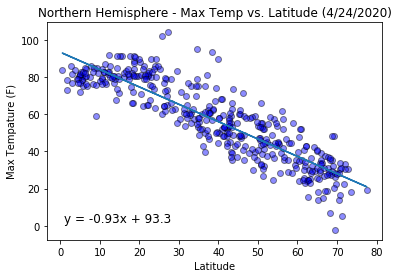

In [128]:
linear_regression(N_Lat,N_Max_Temp)
plt.title("Northern Hemisphere - Max Temp vs. Latitude (4/24/20)")
plt.ylabel("Max Tempature (F)")
#Show Plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

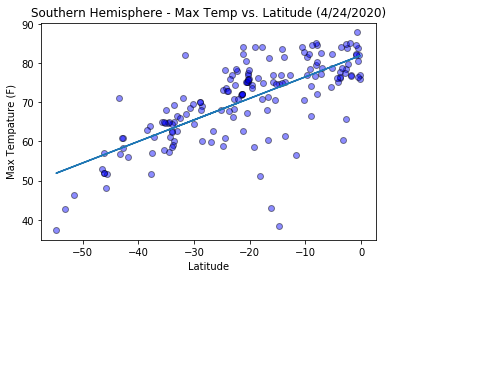

In [129]:
linear_regression(S_Lat,S_Max_Temp)
plt.title("Southern Hemisphere - Max Temp vs. Latitude (4/24/20)")
plt.ylabel("Max Tempature (F)")

#SHOW 
plt.show



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

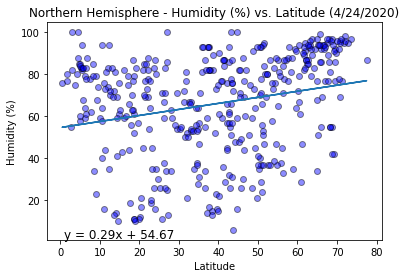

In [130]:
linear_regression(N_Lat,N_Humidity)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude (4/24/20)")
plt.ylabel("Humidity (%)")

#SHOW 
plt.show


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

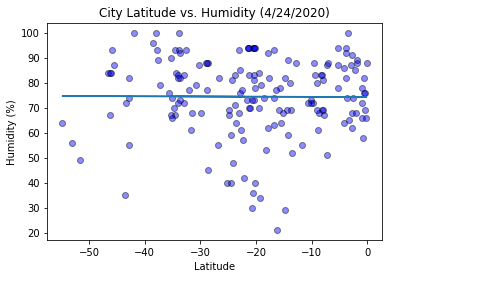

In [125]:
linear_regression(S_Lat,S_Humidity)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude (4/24/20)")
plt.ylabel("Humidity (%)")

#SHOW 
plt.show


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

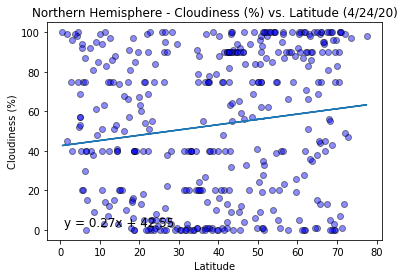

In [131]:
linear_regression(N_Lat,N_Cloud)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (4/24/20)")
plt.ylabel("Cloudiness (%)")

#SHOW 
plt.show


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

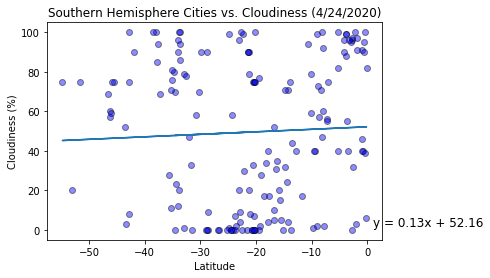

In [126]:
linear_regression(S_Lat,S_Cloud)
plt.title("Southern Hemisphere Cities vs. Cloudiness (4/24/20)")
plt.ylabel("Cloudiness (%)")

#SHOW 
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

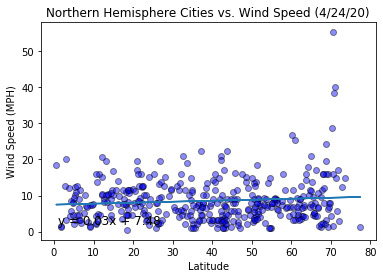

In [132]:
linear_regression(N_Lat,N_Wind)
plt.title("Northern Hemisphere Cities vs. Wind Speed (4/24/20)")
plt.ylabel("Wind Speed (MPH)")

#SHOW 
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(*args, **kw)>

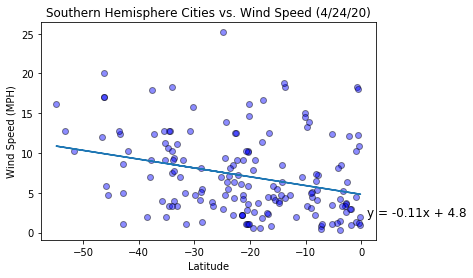

In [133]:
linear_regression(S_Lat,S_Wind)
plt.title("Southern Hemisphere Cities vs. Wind Speed (4/24/20)")
plt.ylabel("Wind Speed (MPH)")

#SHOW 
plt.show